In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
alldata= pd.read_csv("A:/Downloads/WELL LOG TO TOC.csv")

In [3]:
pip install correlation

Note: you may need to restart the kernel to use updated packages.


In [4]:
alldata.head()

,Depth,RxoRt,RLL3,SP,RLD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR,TOC#1,TOC#2
0,195.5,223.5031,0.4063,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576,3.833936,2.552357
1,196.0,221.4560,0.4047,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495,3.903789,2.569852
2,196.5,219.8248,0.4033,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944,3.979525,2.611339
3,197.0,218.1438,0.4023,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645,4.034672,2.652594
4,197.5,216.4424,0.4011,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659,4.051216,2.672411


In [5]:
alldata.replace(-999, np.nan, inplace=True)

In [6]:
l = alldata.columns
print('The columns are: ',l)

The columns are:  Index(['Depth', 'RxoRt', 'RLL3', 'SP', 'RLD', 'MN', 'MI', 'MCAL', 'DCAL',
       'RHOB', 'RHOC', 'DPOR', 'CNLS', 'GR', 'TOC#1', 'TOC#2'],
      dtype='object')


In [7]:
print(alldata.isnull().sum())
print('\n\nNo null values')

Depth    2
RxoRt    2
RLL3     2
SP       1
RLD      1
MN       1
MI       1
MCAL     1
DCAL     1
RHOB     1
RHOC     1
DPOR     1
CNLS     1
GR       0
TOC#1    0
TOC#2    0
dtype: int64


No null values


In [8]:
alldata.describe().T

,count,mean,std,min,25%,50%,75%,max
Depth,8738.0,2535.995251,1358.093146,195.500000,1292.625000,2623.750000,3715.875000,4808.000000
RxoRt,8738.0,-18.521581,31.313577,-150.821900,-31.996625,-16.516700,-5.941550,247.583200
RLL3,8738.0,37.953216,81.738272,0.389900,6.431550,12.139100,25.698000,880.859400
SP,8739.0,-94.299762,39.652558,-201.623000,-131.421100,-95.587500,-58.054000,69.895300
RLD,8739.0,34.511874,251.238360,0.210400,4.356500,7.822900,19.486800,11510.641600
MN,8739.0,11.714442,27.537012,-0.527400,0.306700,0.970300,7.978100,252.124200
MI,8739.0,12.180632,28.874862,-0.673500,0.097650,0.361700,7.307150,234.871500
MCAL,8739.0,5.906369,1.305561,5.047400,5.089800,5.098500,7.764550,10.308600
DCAL,8739.0,3.669944,2.748873,1.885300,1.919350,1.977500,7.850000,12.334900
RHOB,8739.0,2.033640,0.415710,1.190500,1.689050,2.000300,2.456200,2.742300


In [9]:
from collections import Counter

In [10]:
alldata['TOC#1'].value_counts()

2.728412     7
0.434643     6
0.366996     6
0.323613     6
2.452674     5
            ..
2.947899     1
3.033561     1
3.262607     1
4.175482     1
10.077000    1
Name: TOC#1, Length: 6300, dtype: int64

In [11]:
alldata['GR'].value_counts()

92.2511        2
62.5664        2
70.3668        2
37.666         2
78.2845        2
              ..
14.9183        1
13.1348        1
13.4899        1
15.1111        1
Average TOC    1
Name: GR, Length: 8702, dtype: int64

In [12]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8740 entries, 0 to 8739
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   8738 non-null   float64
 1   RxoRt   8738 non-null   float64
 2   RLL3    8738 non-null   float64
 3   SP      8739 non-null   float64
 4   RLD     8739 non-null   float64
 5   MN      8739 non-null   float64
 6   MI      8739 non-null   float64
 7   MCAL    8739 non-null   float64
 8   DCAL    8739 non-null   float64
 9   RHOB    8739 non-null   float64
 10  RHOC    8739 non-null   float64
 11  DPOR    8739 non-null   float64
 12  CNLS    8739 non-null   float64
 13  GR      8740 non-null   object 
 14  TOC#1   8740 non-null   float64
 15  TOC#2   8740 non-null   float64
dtypes: float64(15), object(1)
memory usage: 1.1+ MB


In [13]:
type(alldata)

pandas.core.frame.DataFrame

In [14]:
alldata.dropna(inplace=True)

In [15]:
v1 = lambda x:float(x[1:-1])

In [16]:
alldata.GR=alldata.GR.apply(v1)

In [17]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738 entries, 0 to 8737
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   8738 non-null   float64
 1   RxoRt   8738 non-null   float64
 2   RLL3    8738 non-null   float64
 3   SP      8738 non-null   float64
 4   RLD     8738 non-null   float64
 5   MN      8738 non-null   float64
 6   MI      8738 non-null   float64
 7   MCAL    8738 non-null   float64
 8   DCAL    8738 non-null   float64
 9   RHOB    8738 non-null   float64
 10  RHOC    8738 non-null   float64
 11  DPOR    8738 non-null   float64
 12  CNLS    8738 non-null   float64
 13  GR      8738 non-null   float64
 14  TOC#1   8738 non-null   float64
 15  TOC#2   8738 non-null   float64
dtypes: float64(16)
memory usage: 1.1 MB


In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Depth', ylabel='TOC#2'>

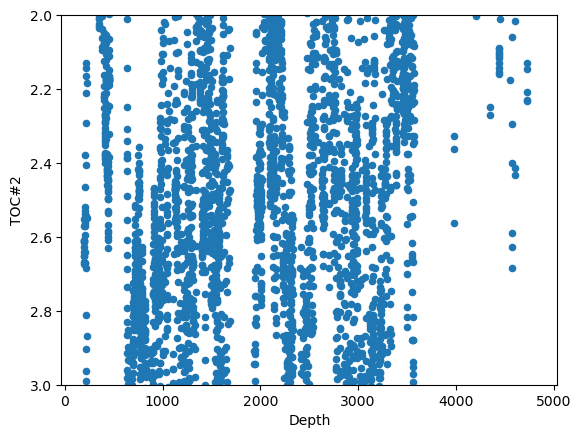

In [19]:
alldata.plot(kind = 'scatter', x = 'Depth', y = 'TOC#2', ylim=(3, 2))

<Axes: xlabel='Depth', ylabel='TOC#2'>

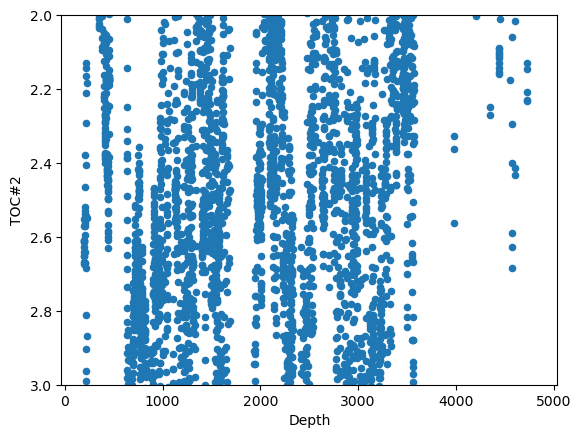

In [20]:
alldata.plot(kind = 'scatter', x = 'Depth', y = 'TOC#2', ylim=(3, 2))

<Axes: ylabel='Frequency'>

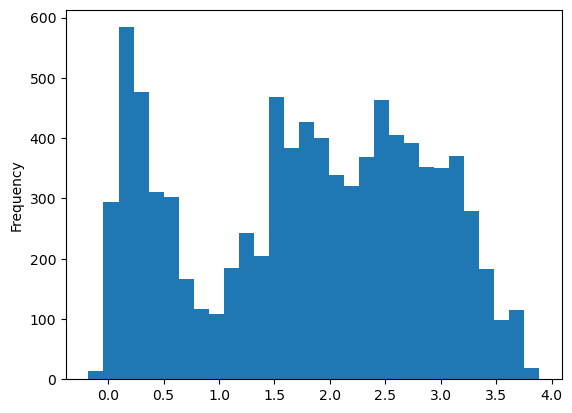

In [21]:
alldata['TOC#2'].plot(kind="hist", bins = 30)

C:\Users\91826\AppData\Local\Temp\ipykernel_14540\2903900980.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)


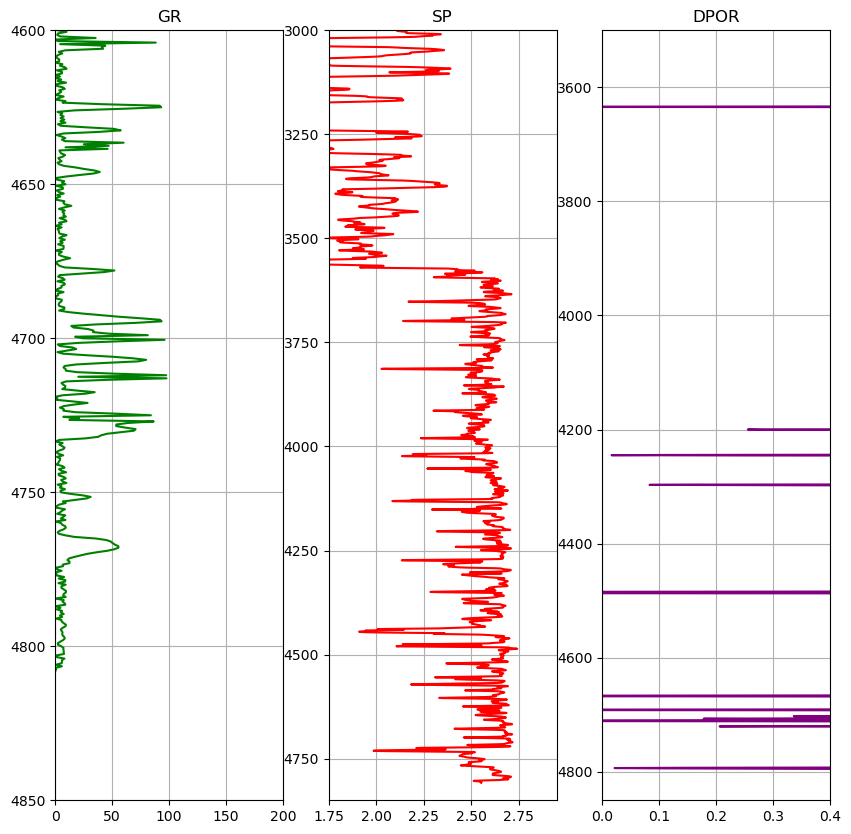

In [22]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "Depth", data = alldata, color = "green") # Call the data from the well dataframe
ax1.set_title("GR") # Assign a track title
ax1.set_xlim(0, 200) # Change the limits for the curve being plotted
ax1.set_ylim(4850, 4600) # Set the depth range
ax1.grid() # Display the grid

ax2.plot("RHOB", "Depth", data = alldata, color = "red")
ax2.set_title("SP")
ax2.set_xlim(1.75, 2.95)
ax2.set_ylim(4850, 3000)
ax2.grid()

ax3.plot("DPOR", "Depth", data = alldata, color = "purple")
ax3.set_title("DPOR")
ax3.set_xlim(0, 0.4)
ax3.set_ylim(4850, 3500)
ax3.grid()


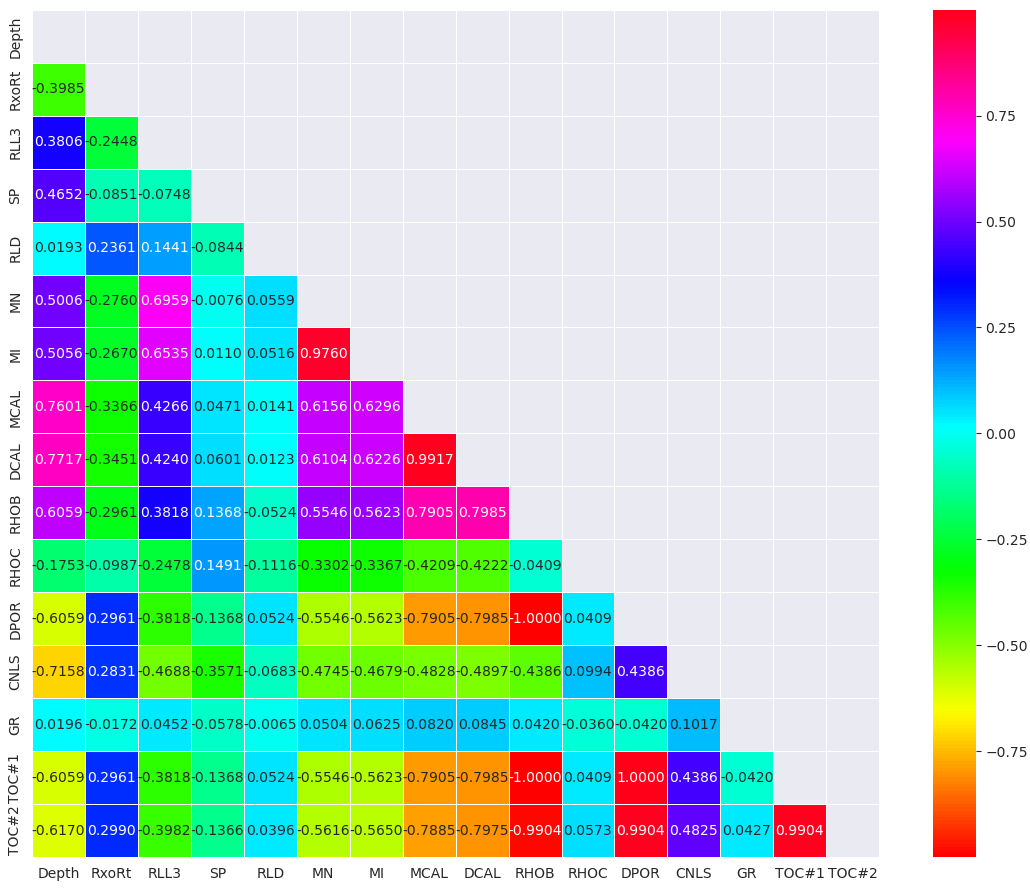

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'alldata' is your DataFrame
numeric_data = alldata.select_dtypes(include=np.number)
corr = numeric_data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(14, 11))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='0.4f', linewidths=.4, cmap="hsv")


In [24]:
corr_matrix=alldata.corr()

In [25]:
corr_matrix

,Depth,RxoRt,RLL3,SP,RLD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR,TOC#1,TOC#2
Depth,1.000000,-0.398451,0.380559,0.465173,0.019250,0.500551,0.505621,0.760131,0.771706,0.605945,-0.175251,-0.605945,-0.715820,0.019635,-0.605945,-0.617028
RxoRt,-0.398451,1.000000,-0.244799,-0.085125,0.236123,-0.276044,-0.267019,-0.336613,-0.345149,-0.296103,-0.098661,0.296102,0.283126,-0.017171,0.296101,0.299005
RLL3,0.380559,-0.244799,1.000000,-0.074788,0.144130,0.695863,0.653505,0.426647,0.423978,0.381839,-0.247841,-0.381839,-0.468816,0.045186,-0.381838,-0.398164
SP,0.465173,-0.085125,-0.074788,1.000000,-0.084409,-0.007616,0.010956,0.047150,0.060063,0.136789,0.149104,-0.136788,-0.357079,-0.057828,-0.136790,-0.136559
RLD,0.019250,0.236123,0.144130,-0.084409,1.000000,0.055915,0.051638,0.014101,0.012287,-0.052419,-0.111587,0.052419,-0.068324,-0.006496,0.052419,0.039607
MN,0.500551,-0.276044,0.695863,-0.007616,0.055915,1.000000,0.975965,0.615641,0.610413,0.554571,-0.330190,-0.554571,-0.474511,0.050437,-0.554571,-0.561632
MI,0.505621,-0.267019,0.653505,0.010956,0.051638,0.975965,1.000000,0.629608,0.622561,0.562311,-0.336750,-0.562311,-0.467943,0.062464,-0.562311,-0.564961
MCAL,0.760131,-0.336613,0.426647,0.047150,0.014101,0.615641,0.629608,1.000000,0.991735,0.790549,-0.420948,-0.790549,-0.482810,0.082001,-0.790549,-0.788538
DCAL,0.771706,-0.345149,0.423978,0.060063,0.012287,0.610413,0.622561,0.991735,1.000000,0.798477,-0.422233,-0.798476,-0.489701,0.084540,-0.798477,-0.797487
RHOB,0.605945,-0.296103,0.381839,0.136789,-0.052419,0.554571,0.562311,0.790549,0.798477,1.000000,-0.040924,-1.000000,-0.438577,0.042021,-1.000000,-0.990374


<Axes: >

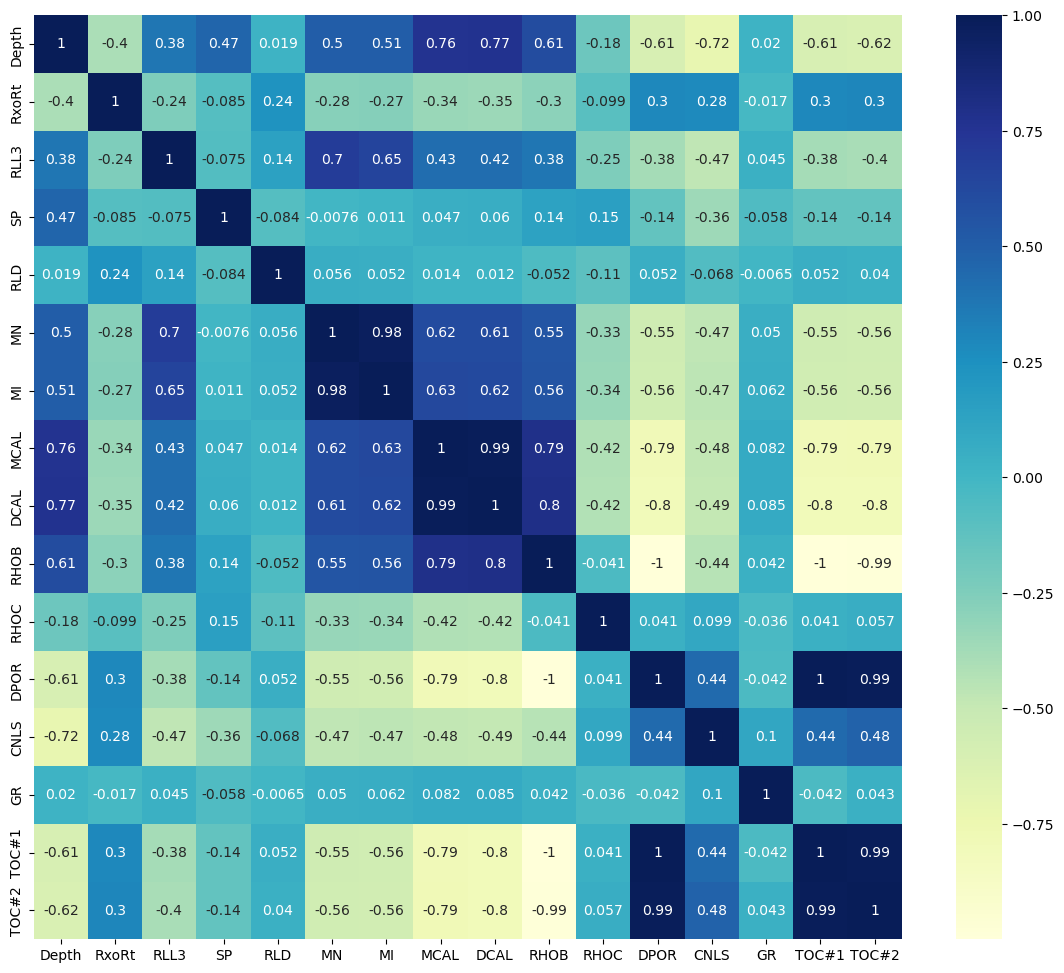

In [26]:
plt.figure(figsize=(14,12))
sns.heatmap(alldata.corr(), annot=True, cmap="YlGnBu")


In [27]:
corr_matrix["TOC#2"]

Depth   -0.617028
RxoRt    0.299005
RLL3    -0.398164
SP      -0.136559
RLD      0.039607
MN      -0.561632
MI      -0.564961
MCAL    -0.788538
DCAL    -0.797487
RHOB    -0.990374
RHOC     0.057316
DPOR     0.990374
CNLS     0.482459
GR       0.042679
TOC#1    0.990374
TOC#2    1.000000
Name: TOC#2, dtype: float64

In [28]:
corr_GR_TOC = np.corrcoef(alldata['GR'], alldata['TOC#2'])
print(corr_GR_TOC)

[[1.         0.04267867]
 [0.04267867 1.        ]]


In [29]:
corr_DPOR_TOC = np.corrcoef(alldata['DPOR'], alldata['TOC#2'])
print(corr_DPOR_TOC)

[[1.         0.99037429]
 [0.99037429 1.        ]]


In [30]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.model_selection import train_test_split
x = alldata.drop(['TOC#2'], axis=1)
y = alldata['TOC#2']

In [32]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [33]:
train_data=x_train.join(y_train)

In [34]:
train_data

,Depth,RxoRt,RLL3,SP,RLD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR,TOC#1,TOC#2
7538,4208.5,-58.2449,145.1383,-80.9714,44.6746,131.5392,146.9702,8.0030,8.0839,2.6421,0.0272,3.9716,4.2473,6.631,0.363319,0.116004
3049,1816.0,1.9974,29.8900,-190.6639,21.3360,-0.1067,-0.2081,5.0868,1.9296,1.2419,-0.0330,85.8534,30.3432,3.207,5.511155,3.601700
5825,3352.0,-11.9627,27.7108,-38.4156,18.8493,1.2055,0.2754,5.0868,2.0396,1.9801,0.2400,42.6846,4.1166,6.144,2.797162,1.878863
5749,3314.0,-10.2945,6.7034,-30.7568,4.9342,0.2867,0.0923,5.0958,2.0211,2.0294,0.2623,39.8027,23.1810,2.389,2.615911,1.914806
8198,4538.5,-28.8707,59.1025,-101.8217,37.5817,55.1658,60.1738,8.0093,8.0254,2.6579,0.0220,3.0451,4.4869,9.675,0.305231,0.220733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,4364.0,-31.7365,46.5049,-137.6887,24.8384,10.2876,6.4498,7.7246,7.7995,2.5777,0.0955,7.7375,8.8278,0.222,0.600086,0.247127
4567,2723.0,-21.4110,8.0350,-37.1639,4.8923,0.2270,0.0508,5.0908,1.9792,1.9724,0.2387,43.1349,18.6108,2.853,2.825471,1.883558
210,305.5,-1.0791,18.2707,-129.1349,17.8542,0.7833,0.3631,5.0996,1.8861,2.1747,0.0633,31.3066,35.6308,13.488,2.081715,1.604342
2360,1380.5,-3.6382,7.8991,-136.2608,6.9646,6.9513,9.0672,5.0841,1.9254,1.9120,0.2238,46.6660,27.0749,8.115,3.047532,2.229573


array([[<Axes: title={'center': 'Depth'}>,
        <Axes: title={'center': 'RxoRt'}>,
        <Axes: title={'center': 'RLL3'}>, <Axes: title={'center': 'SP'}>],
       [<Axes: title={'center': 'RLD'}>, <Axes: title={'center': 'MN'}>,
        <Axes: title={'center': 'MI'}>, <Axes: title={'center': 'MCAL'}>],
       [<Axes: title={'center': 'DCAL'}>,
        <Axes: title={'center': 'RHOB'}>,
        <Axes: title={'center': 'RHOC'}>,
        <Axes: title={'center': 'DPOR'}>],
       [<Axes: title={'center': 'CNLS'}>, <Axes: title={'center': 'GR'}>,
        <Axes: title={'center': 'TOC#1'}>,
        <Axes: title={'center': 'TOC#2'}>]], dtype=object)

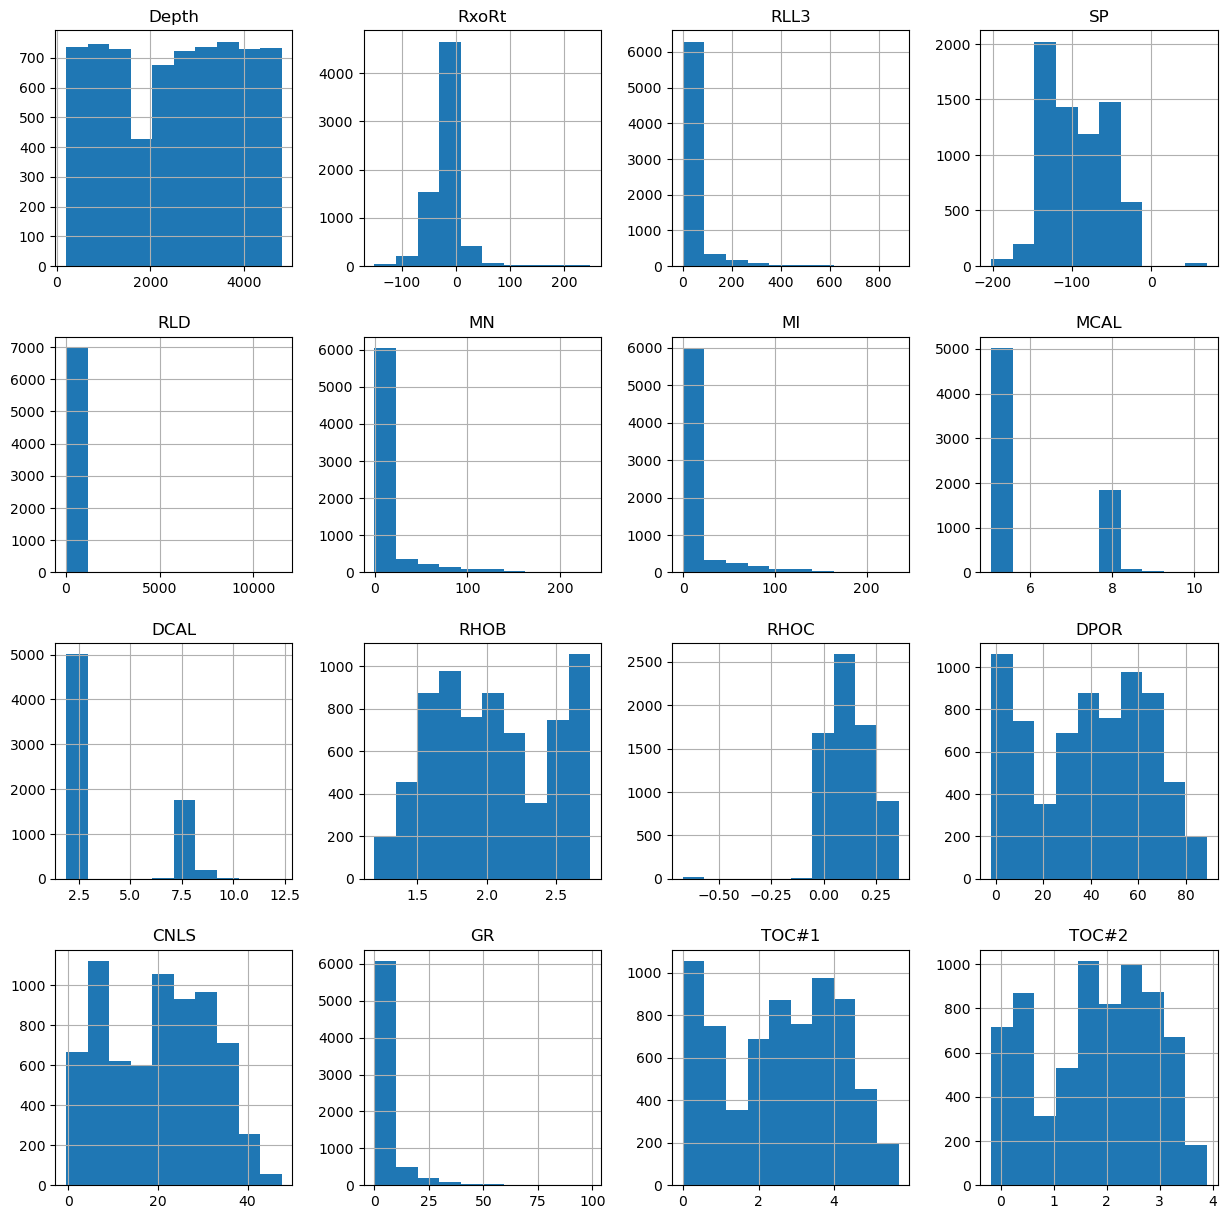

In [35]:
train_data.hist(figsize=(15,15))

In [36]:
import seaborn as sns

In [37]:
x_train, y_train = train_data.drop(['TOC#2'], axis=1), train_data['TOC#2']

In [38]:
x_train

,Depth,RxoRt,RLL3,SP,RLD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR,TOC#1
7538,4208.5,-58.2449,145.1383,-80.9714,44.6746,131.5392,146.9702,8.0030,8.0839,2.6421,0.0272,3.9716,4.2473,6.631,0.363319
3049,1816.0,1.9974,29.8900,-190.6639,21.3360,-0.1067,-0.2081,5.0868,1.9296,1.2419,-0.0330,85.8534,30.3432,3.207,5.511155
5825,3352.0,-11.9627,27.7108,-38.4156,18.8493,1.2055,0.2754,5.0868,2.0396,1.9801,0.2400,42.6846,4.1166,6.144,2.797162
5749,3314.0,-10.2945,6.7034,-30.7568,4.9342,0.2867,0.0923,5.0958,2.0211,2.0294,0.2623,39.8027,23.1810,2.389,2.615911
8198,4538.5,-28.8707,59.1025,-101.8217,37.5817,55.1658,60.1738,8.0093,8.0254,2.6579,0.0220,3.0451,4.4869,9.675,0.305231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,4364.0,-31.7365,46.5049,-137.6887,24.8384,10.2876,6.4498,7.7246,7.7995,2.5777,0.0955,7.7375,8.8278,0.222,0.600086
4567,2723.0,-21.4110,8.0350,-37.1639,4.8923,0.2270,0.0508,5.0908,1.9792,1.9724,0.2387,43.1349,18.6108,2.853,2.825471
210,305.5,-1.0791,18.2707,-129.1349,17.8542,0.7833,0.3631,5.0996,1.8861,2.1747,0.0633,31.3066,35.6308,13.488,2.081715
2360,1380.5,-3.6382,7.8991,-136.2608,6.9646,6.9513,9.0672,5.0841,1.9254,1.9120,0.2238,46.6660,27.0749,8.115,3.047532


In [39]:
y_train

7538    0.116004
3049    3.601700
5825    1.878863
5749    1.914806
8198    0.220733
          ...   
7849    0.247127
4567    1.883558
210     1.604342
2360    2.229573
4079    1.919753
Name: TOC#2, Length: 6990, dtype: float64

In [40]:
x_test

,Depth,RxoRt,RLL3,SP,RLD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR,TOC#1
1654,1027.5,8.4457,6.6256,-138.1516,10.2825,0.1984,0.1623,5.0926,1.8986,1.6179,0.1087,63.8642,27.4992,7.244,4.128791
4378,2628.5,-27.6601,2.6898,-58.5146,1.4164,0.1004,0.0170,5.0932,1.9776,2.1268,0.2684,34.1081,25.9338,2.216,2.257820
7251,4065.0,-47.7456,100.8839,-89.5692,22.7964,21.6454,15.5452,7.8885,7.8504,2.6000,0.0514,6.4333,6.8191,8.692,0.518100
7345,4112.0,-48.9876,202.4326,-81.3652,46.2030,133.4973,164.9016,8.0107,8.1078,2.6705,0.0330,2.3115,3.9792,89.403,0.258907
5865,3372.0,-3.1893,6.6222,-25.0426,5.9574,0.3864,0.1070,5.0975,2.0456,2.3319,0.3081,22.1112,19.3382,6.198,1.503770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7884,4381.5,-66.7732,152.7871,-121.6612,26.5809,74.4833,75.2283,8.0037,8.0258,2.6714,0.0252,2.2601,3.4008,3.942,0.255598
81,241.0,2.7518,20.3464,-131.8486,21.0362,0.8770,0.4174,5.0887,1.8864,2.1812,0.0528,30.9212,37.0439,0.970,2.057818
5001,2940.0,-28.7112,8.1926,-57.9181,3.8709,0.3136,0.0856,5.0978,1.9781,1.7877,0.1705,53.9382,16.4123,8.947,3.504521
7294,4086.5,-17.8565,131.8723,-118.7902,90.6579,19.1651,14.1313,7.8348,7.9897,2.6244,0.0572,5.0072,5.3023,7.333,0.428393


In [41]:
y_test

1654    2.908418
4378    1.586574
7251    0.228912
7345    0.710442
5865    1.184501
          ...   
7884    0.118964
81      1.490338
5001    2.366090
7294    0.119255
3131    2.285969
Name: TOC#2, Length: 1748, dtype: float64

In [42]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [43]:
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [45]:
y_lr_train_pred

array([0.23940221, 3.70264812, 1.871156  , ..., 1.53139433, 2.13371045,
       1.87796665])

In [46]:
y_lr_test_pred

array([2.83622601, 1.57469087, 0.31237951, ..., 2.41619797, 0.21628013,
       2.32847038])

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [48]:
print('LR MSE (Train):  ', lr_train_mse)
print('LR R2 (Train):  ', lr_train_r2)
print('LR R2 (Test):  ', lr_test_r2)
print('LR MSE (Test):  ', lr_test_mse)

LR MSE (Train):   0.010383651213107088
LR R2 (Train):   0.9906865816384439
LR R2 (Test):   0.9902831766938814
LR MSE (Test):   0.010754879457067164


In [49]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2,lr_test_mse, lr_test_r2 ])


In [50]:
lr_results

,0
0,Linear regression
1,0.010384
2,0.990687
3,0.010755
4,0.990283


In [51]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,mean_squared_error

In [52]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],          
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name,rms)

Results...

Linear Regression : 0.10370573492853306
Decision Tree Regression : 0.09903995917399099
Random Forest Regression : 0.07373160531034541
Extra Tree Regression : 0.07070576071324355
K-Neighbors Regression : 0.14690883823365858
Support Vector Regression : 0.41145333807823753


In [53]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Extra Tree Regression' ,'K-Neighbors Regression', 'Support Vector Regression' ]
x_ax=reg_pred

<Axes: >

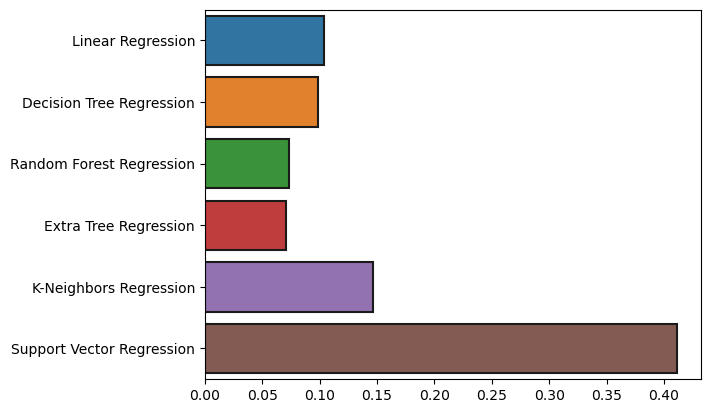

In [54]:
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")

In [55]:
from sklearn import model_selection
import time

accuracy = []
model_name = []
model_time = []

for name, model in regressors:
    begin_time = time.time()
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold)
    accuracy.append(cv_results)
    model_name.append(name)
    end_time = time.time()
    model_time.append(end_time - begin_time)

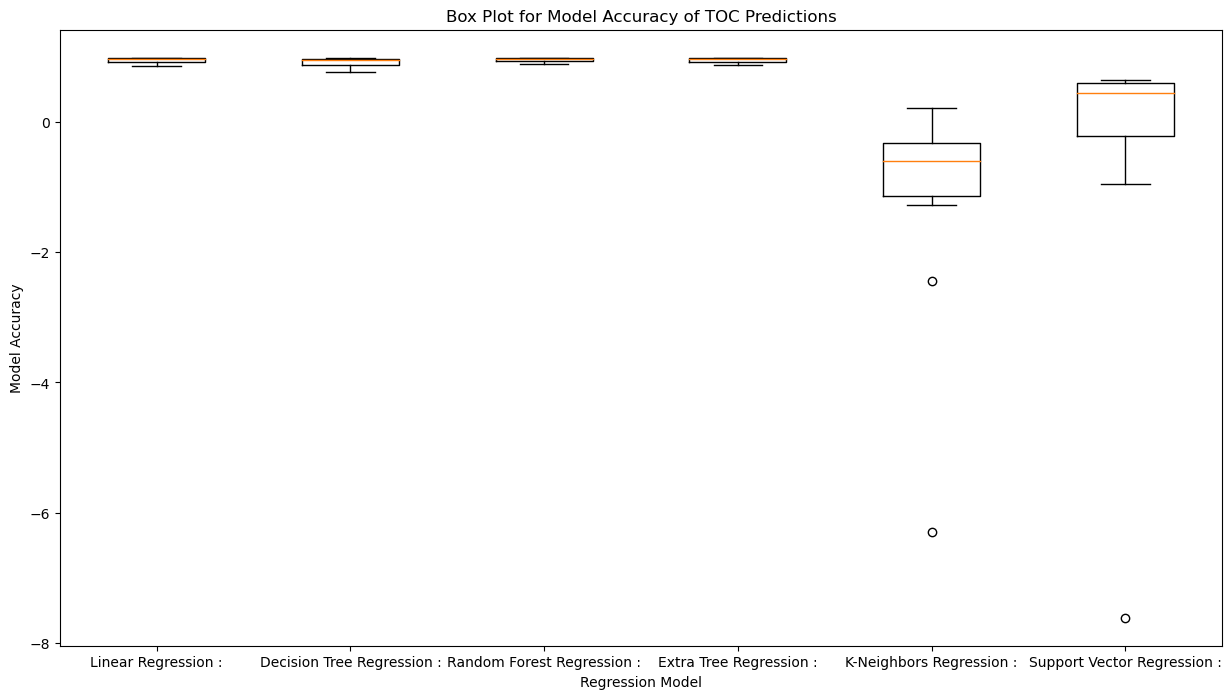

In [56]:
plt.figure(figsize=(15,8))
plt.boxplot(accuracy)
plt.title('Box Plot for Model Accuracy of TOC Predictions')
plt.xlabel('Regression Model')
plt.ylabel('Model Accuracy')
plt.xticks([1,2,3,4,5,6], labels=model_name)
plt.show()

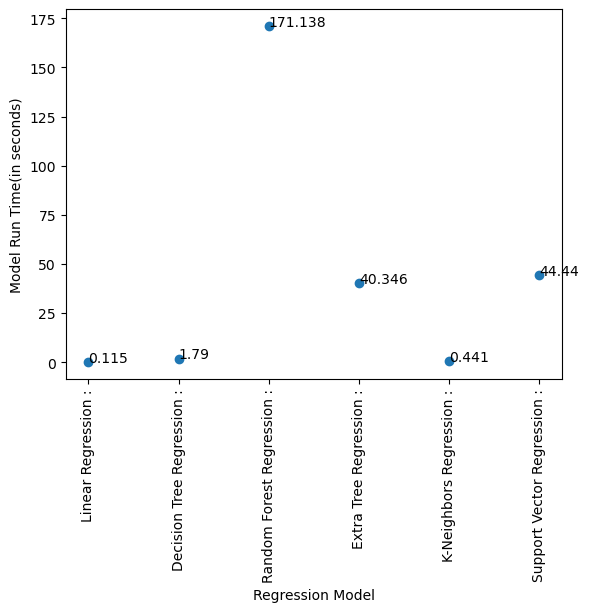

In [57]:
plt.scatter(model_name, model_time)
plt.xlabel('Regression Model')
plt.xticks(rotation=90)
plt.ylabel('Model Run Time(in seconds)')

for i in range(len(model_name)):
  plt.annotate(round(model_time[i],3),(model_name[i],model_time[i]+0.1))

plt.show()

In [58]:
y_pred_test_best = best_rf_model.predict(x_test)

best_model_mse = mean_squared_error(y_test, y_pred_test_best)
best_model_r2 = r2_score(y_test, y_pred_test_best)

print('Best Model MSE (Test):  ', best_model_mse)
print('Best Model R2 (Test):  ', best_model_r2)


NameError: name 'best_rf_model' is not defined

In [59]:
from sklearn.decomposition import PCA


In [60]:
 plt.scatter(y_test, y_pred_test_best)
 plt.xlabel('True Values ')
 plt.ylabel('Predictions ')
 plt.axis('equal')
 plt.axis('square')
 plt.xlim([0, plt.xlim()])
 plt.ylim([0, plt.ylim()])
 _ = plt.plot([-100, 100], [-100, 100])

NameError: name 'y_pred_test_best' is not defined

In [61]:
y_pred_test_best

NameError: name 'y_pred_test_best' is not defined

In [62]:
y_test

1654    2.908418
4378    1.586574
7251    0.228912
7345    0.710442
5865    1.184501
          ...   
7884    0.118964
81      1.490338
5001    2.366090
7294    0.119255
3131    2.285969
Name: TOC#2, Length: 1748, dtype: float64

In [63]:
plt.scatter(y_test, y_pred_test_best)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

NameError: name 'y_pred_test_best' is not defined

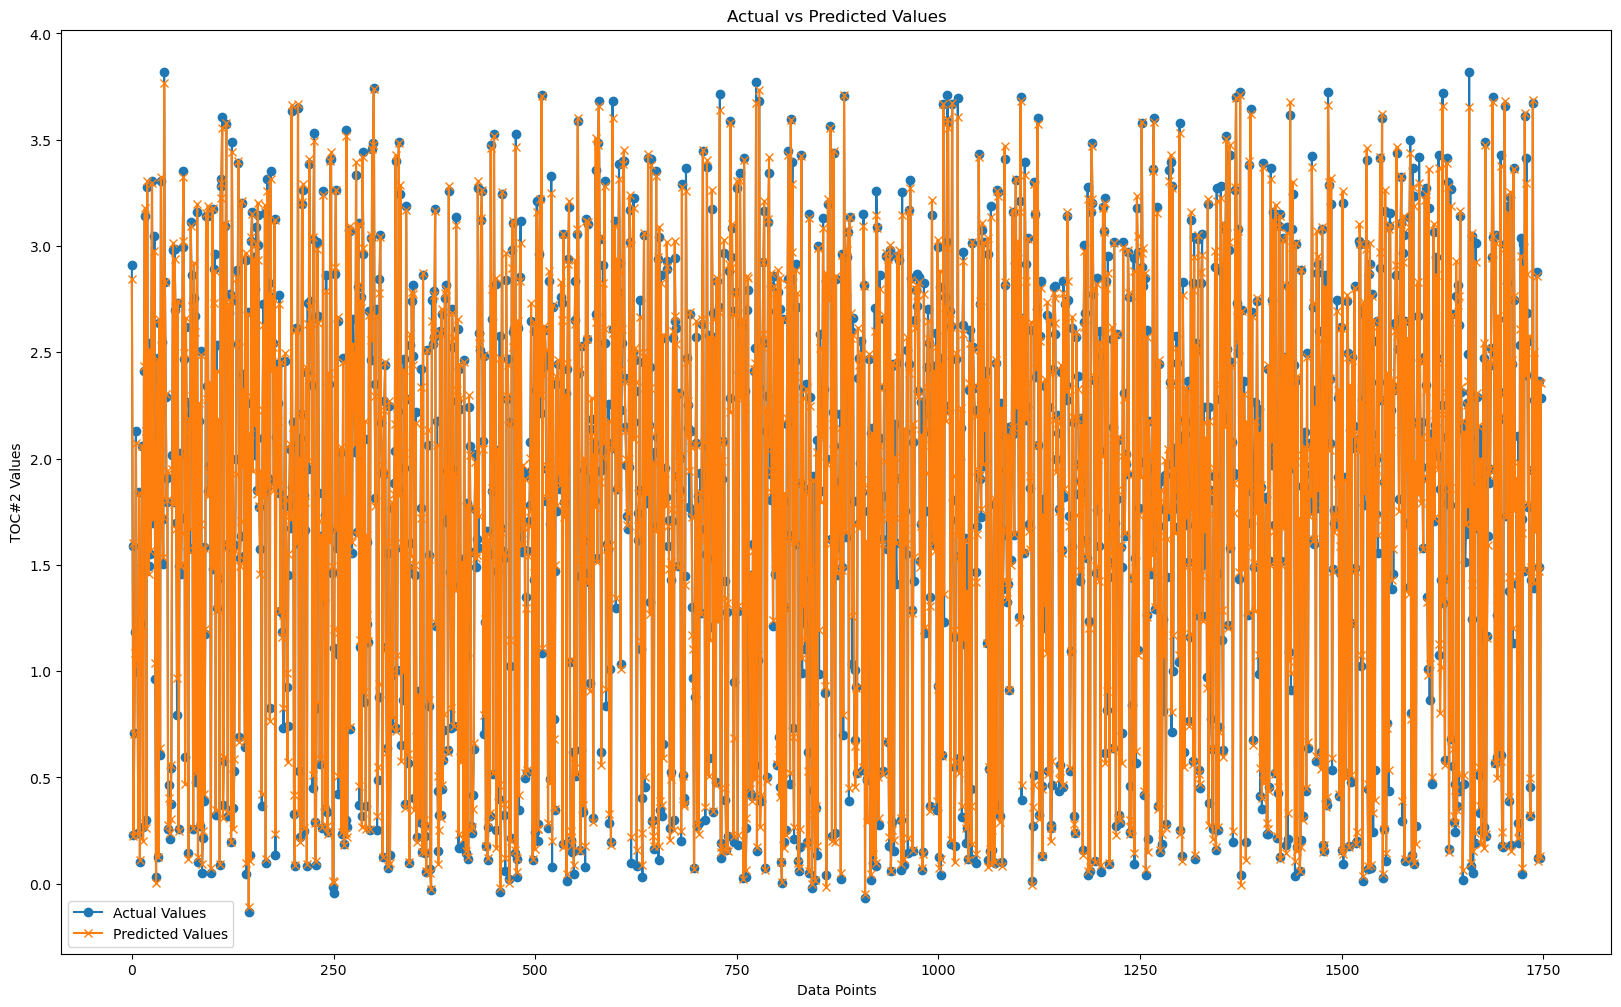

In [64]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Plot the line graph between predicted and actual values
plt.figure(figsize=(20, 12))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('TOC#2 Values')
plt.legend()
plt.show()

In [65]:
y_pred

array([2.84352445, 1.60105101, 0.22298247, ..., 2.36255934, 0.13016058,
       2.35666116])

In [66]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  width = 12
  height = 10
  plt.figure(figsize=(width, height))
  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
  
  plt.title(Title)
  plt.xlabel("Actual Values (Train)")
  plt.ylabel("Predicted Values (Train)")
  
  plt.show()
  plt.close()

C:\Users\91826\AppData\Local\Temp\ipykernel_14540\435442404.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\91826\AppData\Local\Temp\ipykernel_14540\435442404.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.

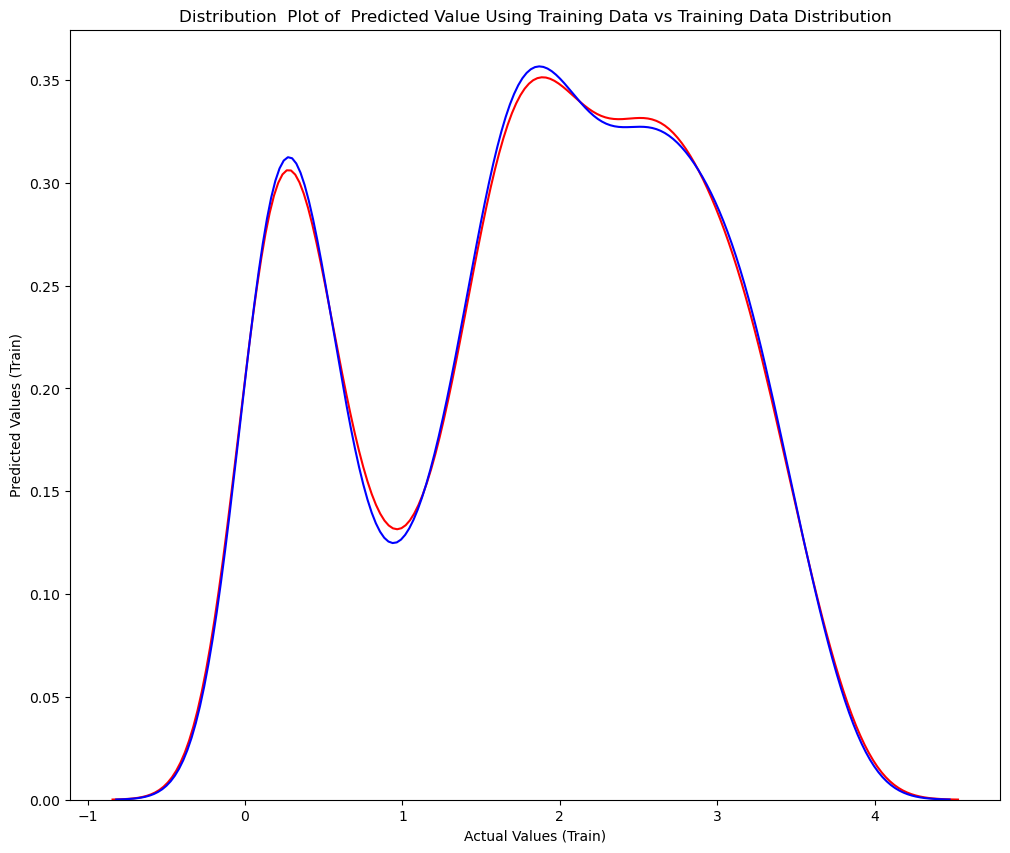

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures


Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [68]:
print(y_pred)

[2.84352445 1.60105101 0.22298247 ... 2.36255934 0.13016058 2.35666116]


In [69]:
print(y_test)

1654    2.908418
4378    1.586574
7251    0.228912
7345    0.710442
5865    1.184501
          ...   
7884    0.118964
81      1.490338
5001    2.366090
7294    0.119255
3131    2.285969
Name: TOC#2, Length: 1748, dtype: float64


ValueError: x and y must have same first dimension, but have shapes (8738, 15) and (1748,)

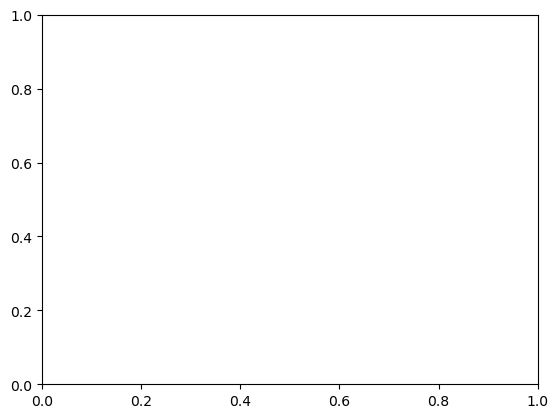

In [70]:

# create data 
#x = [1,2,3,4,5] 
#y = [3,3,3,3,3] 
  

plt.plot(x, y_test, label = "curve 1") 
plt.plot(x, y_pred, label = "curve 2") 
plt.legend() 
plt.show()

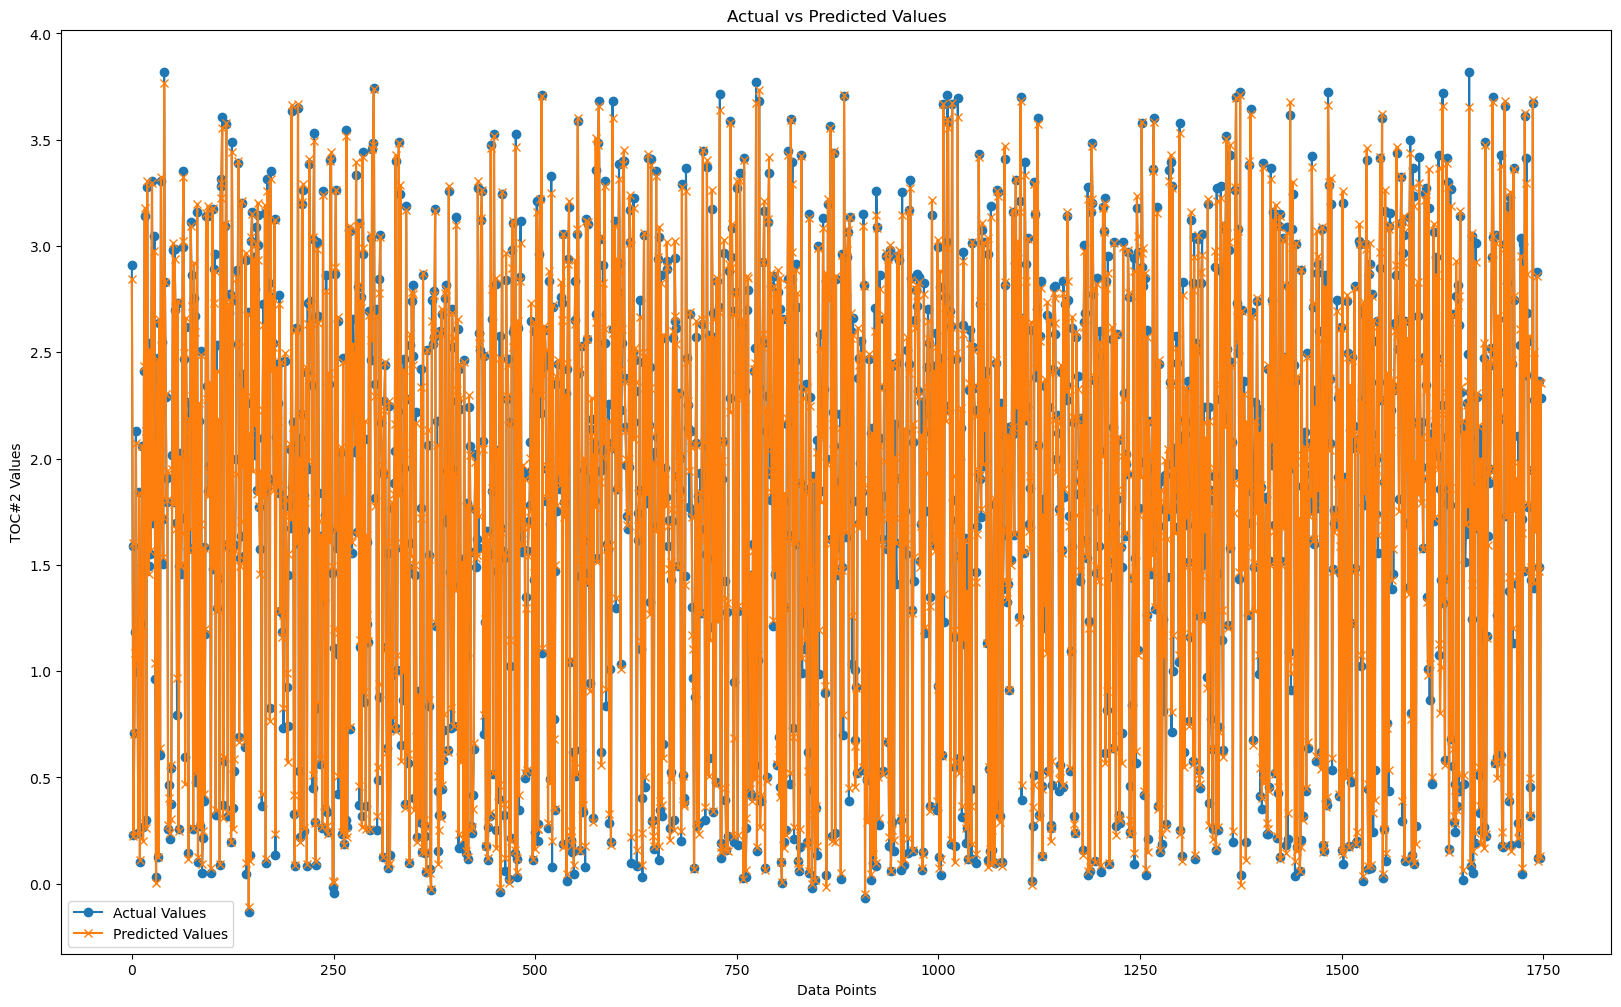

C:\Users\91826\AppData\Local\Temp\ipykernel_14540\1083706480.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\91826\AppData\Local\Temp\ipykernel_14540\1083706480.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

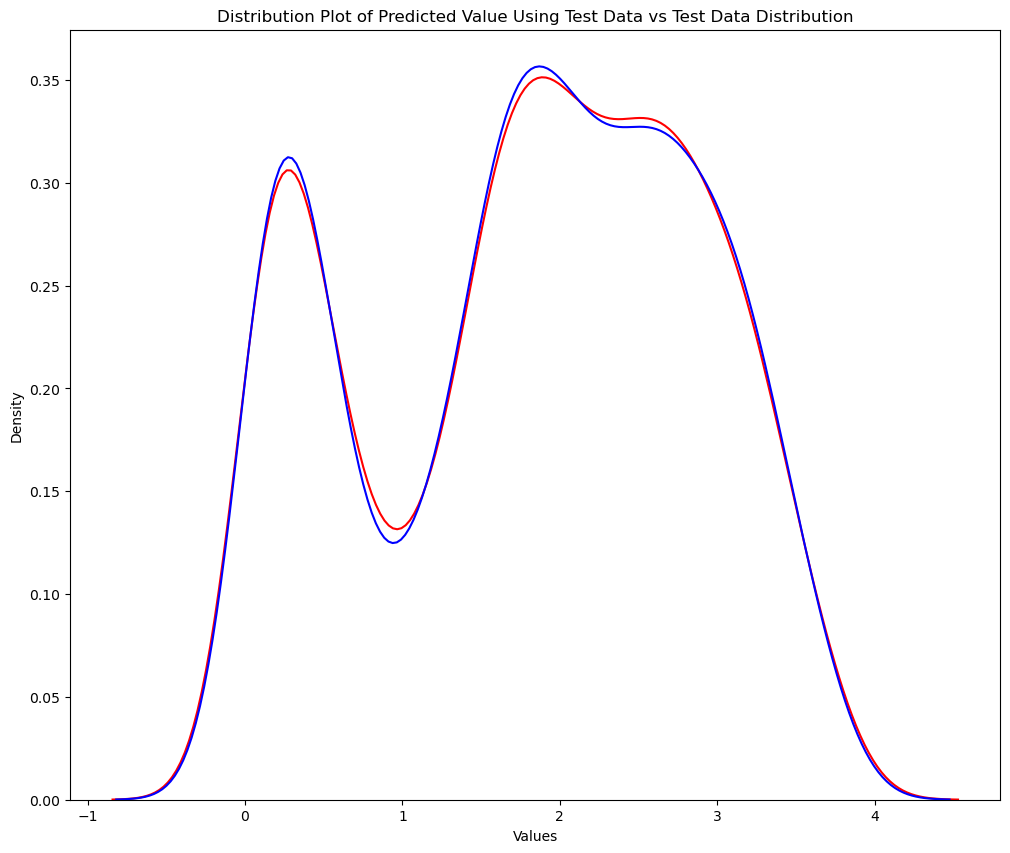

In [71]:
# Plot the line graph between predicted and actual values
plt.figure(figsize=(20, 12))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('TOC#2 Values')
plt.legend()
plt.show()

# Define the DistributionPlot function
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    sns.distplot(BlueFunction, hist=False, color="b", label=BlueName)
    plt.title(Title)
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.show()

# Use the DistributionPlot function
Title = 'Distribution Plot of Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [72]:

for value in y_test:
    print(value)


2.90841804
1.58657388
0.228911505
0.710442465
1.18450107
2.130726615
1.093955565
0.99527976
0.238778205
1.84322202
0.100496085
1.223326695
1.49894571
2.05689909
0.2671161
2.412310905
3.13953591
2.043739365
0.29818752
3.279896625
1.80847683
1.493687115
2.542340925
1.550376225
2.487603315
3.3058209
1.696135995
2.094286905
3.04502718
0.964996425
0.031649295
1.977803265
2.4733353
0.12764178
2.63923644
0.60531195
3.30478755
2.547253875
1.716260655
1.505885385
3.818768145
2.828613255
2.290683195
1.797461445
1.90758747
0.255200865
0.464461665
0.209424525
0.37521894
0.546399885
2.01706713
2.979558615
1.79760861
2.98585764
2.69988102
1.695337965
0.794089995
2.730530505
0.259416615
1.493082435
2.023957545
1.456346325
1.72067313
2.99596743
3.351958995
2.46925323
0.596040495
2.618622105
2.196524205
1.572883095
0.14385375
2.26795149
1.577234685
3.11439633
2.86163736
2.24840442
0.255858345
2.755567905
2.67262305
0.478270125
2.074678575
3.1613133
0.103603245
2.178357
1.562116755
0.272811375
2.5041038

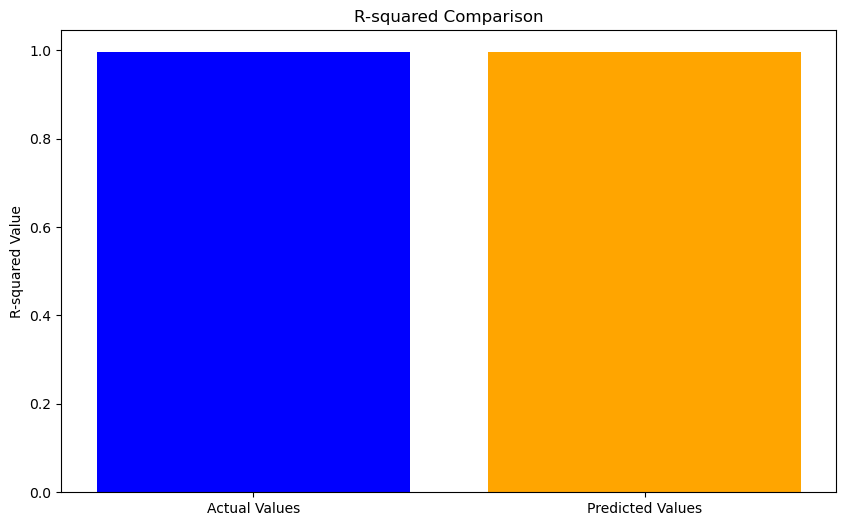

In [73]:
from sklearn.metrics import r2_score

# Calculate R-squared for actual and predicted values
r2_actual = r2_score(y_pred, y_test)
r2_pred = r2_score(y_test, y_pred)

# Plot R-squared comparison
plt.figure(figsize=(10, 6))
plt.bar(['Actual Values', 'Predicted Values'], [r2_actual, r2_pred], color=['blue', 'orange'])
plt.title('R-squared Comparison')
plt.ylabel('R-squared Value')
plt.show()


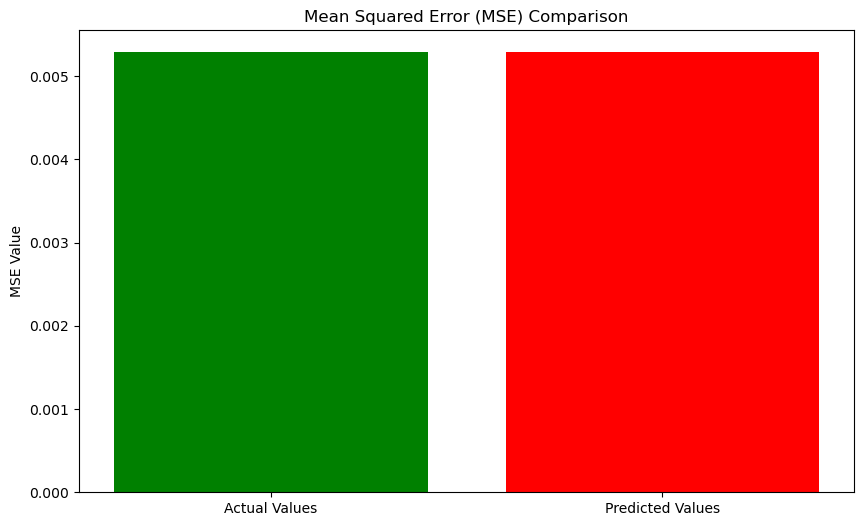

In [74]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for actual and predicted values
mse_actual = mean_squared_error(y_pred, y_test)
mse_pred = mean_squared_error(y_test, y_pred)

# Plot MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(['Actual Values', 'Predicted Values'], [mse_actual, mse_pred], color=['green', 'red'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE Value')
plt.show()


In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_test_best = best_rf_model.predict(x_test)

# Calculate metrics
best_model_mse = mean_squared_error(y_test, y_pred_test_best)
best_model_r2 = r2_score(y_test, y_pred_test_best)

# Output the tuned hyperparameters
print("Tuned hyperparameters for RF:")
print("Hyperparameters\t\tOptimized Value")
print("--------------------------------------------")
print("n_estimators\t\t", best_params['n_estimators'])
print("max_depth\t\t", best_params['max_depth'])
print("min_samples_split\t", best_params['min_samples_split'])
print("min_samples_leaf\t", best_params['min_samples_leaf'])

# Additional requested hyperparameters
print("--------------------------------------------")
print("bootstrap\t\t", best_params.get('bootstrap', True))
print("max_features\t\t", best_params.get('max_features', 'auto'))

# Additional metrics
print("--------------------------------------------")
print("Best Model MSE (Test):  ", best_model_mse)
print("Best Model R2 (Test):  ", best_model_r2)


NameError: name 'x_train' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define regressors and their parameter grids
regressors = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree Regression': (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
    'Random Forest Regression': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Extra Tree Regression': (ExtraTreesRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'K-Neighbors Regression': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    'Support Vector Regression': (SVR(), {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]})
}

results = []

# Iterate over each regressor
for name, (model, param_grid) in regressors.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    y_pred_test = best_model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    
    results.append([name, best_params, mse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Regressor', 'Best Parameters', 'MSE', 'R2 Score'])

# Display results
print(results_df)


In [ ]:
optimized_rf_model

In [ ]:
# Make predictions using the optimized model
y_pred_test_optimized = optimized_rf_model.predict(x_test)

# Calculate metrics
optimized_model_mse = mean_squared_error(y_test, y_pred_test_optimized)
optimized_model_r2 = r2_score(y_test, y_pred_test_optimized)

# Output the results
print('Optimized Model MSE (Test):  ', optimized_model_mse)
print('Optimized Model R2 (Test):  ', optimized_model_r2)


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_optimized, color='orange', alpha=0.5, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2, label='Actual')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values (Test set)')
plt.legend()
plt.show()


In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test_optimized

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test_optimized, residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='orange', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_optimized, color='orange', alpha=0.5, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2, label='Actual')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values (Test set)')
plt.legend()
plt.show()

# Calculate residuals
residuals = y_test - y_pred_test_optimized

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test_optimized, residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='orange', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:
pip install tensorflow tensorflow-probability


In [ ]:
pip install tensorflow-probability[tf]


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

class DenseVariationalLayer(tf.keras.layers.Layer):
    def __init__(self, units, activation='relu', **kwargs):
        super(DenseVariationalLayer, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.dense_variational = tfp.layers.DenseVariational(
            units=self.units,
            make_posterior_fn=self._make_posterior_fn,
            make_prior_fn=self._make_prior_fn,
            kl_weight=1/input_shape[1]
        )
        super().build(input_shape)

    def call(self, inputs):
        return self.activation(self.dense_variational(inputs))

    def _make_posterior_fn(self, dtype, input_shape, *args, **kwargs):
        return tfp.layers.default_mean_field_normal_fn(input_shape, dtype)

    def _make_prior_fn(self, *args, **kwargs):
        return tfp.layers.default_multivariate_normal_fn

def create_bayesian_model(input_shape):
    model = tf.keras.Sequential([
        DenseVariationalLayer(units=32, input_shape=input_shape, activation='relu'),
        DenseVariationalLayer(units=16, activation='relu'),
        DenseVariationalLayer(units=1)
    ])
    return model

# Example: Load and preprocess your dataset
# Assuming x is your feature dataset and y is your target variable

# Generate sample data for demonstration
x = np.random.rand(100, 10)  # Example feature dataset with 100 samples and 10 features
y = np.random.rand(100)      # Example target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a Bayesian neural network model
input_shape = x_train_scaled.shape[1:]
bayesian_model = create_bayesian_model(input_shape)

# Compile the model with appropriate loss function for uncertainty quantification
neg_log_likelihood = lambda y, rv_y: -rv_y.log_prob(y)
bayesian_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                       loss=neg_log_likelihood)

# Train the model
history = bayesian_model.fit(x_train_scaled, y_train, epochs=100, verbose=1, validation_split=0.2)

# Evaluate the model
loss = bayesian_model.evaluate(x_test_scaled, y_test)
print("Test Loss:", loss)

# Make probabilistic predictions using Monte Carlo dropout technique
num_samples = 100
probabilistic_preds = np.array([bayesian_model.predict(x_test_scaled) for _ in range(num_samples)])

# Calculate mean and standard deviation for each prediction
mean_preds = np.mean(probabilistic_preds, axis=0)
std_dev_preds = np.std(probabilistic_preds, axis=0)

# Calculate 95% confidence intervals
confidence_intervals = np.percentile(probabilistic_preds, [2.5, 97.5], axis=0)

# Optionally, you can visualize the results
# e.g., plot mean predictions with error bars representing uncertainty